In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")
X = X[0:1000]
y = y[0:1000]

In [5]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


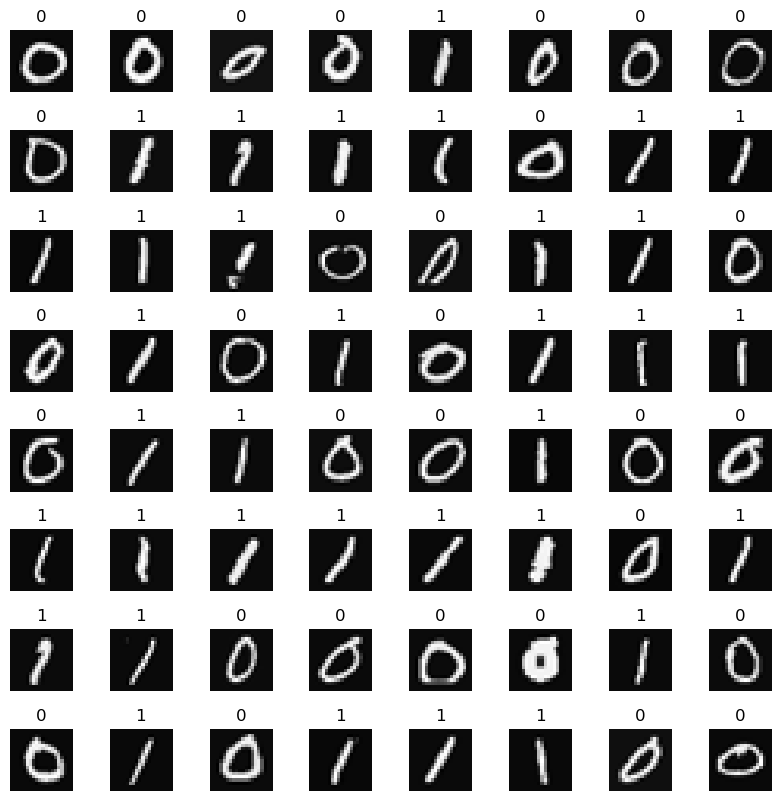

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [9]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "my_model" 
)     

In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [12]:
print(model.layers[0].weights)

[<tf.Variable 'dense_3/kernel:0' shape=(400, 25) dtype=float32, numpy=
array([[-0.03751336,  0.10921247,  0.08553067, ..., -0.01625132,
        -0.03839301,  0.02649324],
       [-0.09125736, -0.09286305,  0.0971615 , ..., -0.03377529,
        -0.10828055,  0.00420611],
       [-0.04336421,  0.00623085,  0.10828789, ...,  0.05112423,
         0.11197349,  0.08720596],
       ...,
       [ 0.05325757, -0.10013204,  0.00301213, ..., -0.08543042,
         0.05591613,  0.01361716],
       [-0.07535918, -0.07042915,  0.10064289, ...,  0.03127135,
        -0.04781879,  0.09398142],
       [ 0.04939766,  0.02667043, -0.0980279 , ...,  0.1037156 ,
        -0.0351918 ,  0.11145794]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(25,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]


In [13]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6176
Epoch 2/20
32/32 [==============================] - 0s 920us/step - loss: 0.4440
Epoch 3/20
32/32 [==============================] - 0s 968us/step - loss: 0.2919
Epoch 4/20
32/32 [==============================] - 0s 936us/step - loss: 0.1951
Epoch 5/20
32/32 [==============================] - 0s 952us/step - loss: 0.1391
Epoch 6/20
32/32 [==============================] - 0s 936us/step - loss: 0.1048
Epoch 7/20
32/32 [==============================] - 0s 903us/step - loss: 0.0825
Epoch 8/20
32/32 [==============================] - 0s 920us/step - loss: 0.0673
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0564
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 11/20
32/32 [==============================] - 0s 920us/step - loss: 0.0418
Epoch 12/20
32/32 [==============================] - 0s 936us/step - loss: 0.0367
Epoch 13/20
32/32 [============

1/1 [==============================] - 0s 20ms/step


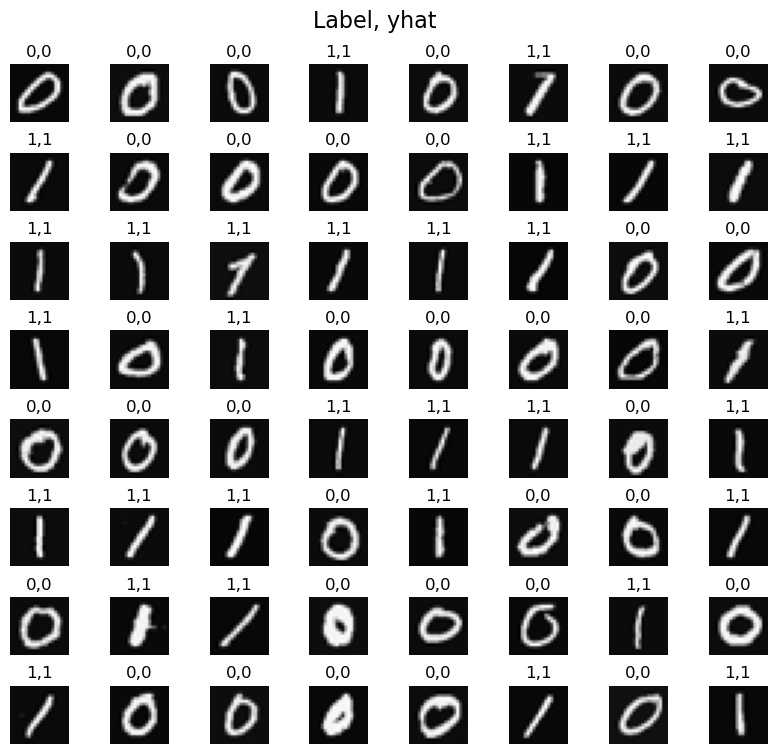

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()